# 1. Simulation of Markov Process

## b

In [1]:
import numpy as np

# Transition matrix P
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

# Initial state X0
X0 = 1  # Starting from state 1

# Number of steps in the chain
num_steps = 10  

current_state = X0

for i in range(num_steps):
    # Select the probabilities from the transition matrix for the current state
    probabilities = P[current_state - 1]  # -1 because Python starts indexing from 0

    # Move to the next state based on the probabilities
    next_state = np.random.choice([1, 2, 3], p=probabilities)

    # Update the current state
    current_state = next_state
    print(f"X{i + 1} = {current_state}")


X1 = 2
X2 = 2
X3 = 2
X4 = 3
X5 = 3
X6 = 2
X7 = 2
X8 = 2
X9 = 2
X10 = 2


# 2. Stationary Distribution

## a

In [2]:
import numpy as np

# Transpose of P
P_transpose = P.T

# Identity matrix
I = np.identity(len(P))

# Solve for the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(P_transpose - I)

# Find the eigenvector corresponding to eigenvalue 1 (close to 1)
index = np.argmin(abs(eigenvalues - 1))
stationary_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution vector
stationary_distribution /= np.sum(stationary_distribution)

print("Theoretical Stationary Distribution (π∞):")
print(stationary_distribution)


Theoretical Stationary Distribution (π∞):
[0.2        0.51111111 0.28888889]


## b

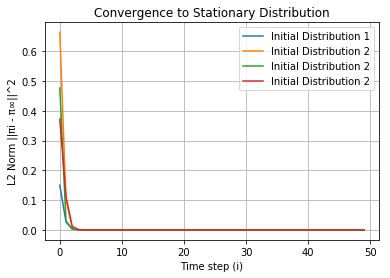

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initial probability distributions π0 (at least two different)
pi0_1 = np.array([0.3, 0.4, 0.3])  
pi0_2 = np.array([0.1, 0.1, 0.8])  
pi0_3 = np.array([0, 0.9, 0.1])  
pi0_4 = np.array([0.5, 0.4, 0.1]) 

# Number of steps
num_steps = 50

# Compute πi for each initial distribution
def calculate_pi_i(pi_0):
    pi_i_values = []
    for i in range(num_steps):
        pi_i = pi_0 @ np.linalg.matrix_power(P, i)
        pi_i_values.append(pi_i)
    return pi_i_values

pi_i_values_1 = calculate_pi_i(pi0_1)
pi_i_values_2 = calculate_pi_i(pi0_2)
pi_i_values_3 = calculate_pi_i(pi0_3)
pi_i_values_4 = calculate_pi_i(pi0_4)

# Calculate L2 norm between πi and π∞ for each time step
def calculate_norm(pi_i_values, stationary_distribution):
    norms = []
    for pi_i in pi_i_values:
        norm = np.linalg.norm(pi_i - stationary_distribution, ord=2)
        norms.append(norm)
    return norms

norms_1 = calculate_norm(pi_i_values_1, stationary_distribution)
norms_2 = calculate_norm(pi_i_values_2, stationary_distribution)
norms_3 = calculate_norm(pi_i_values_3, stationary_distribution)
norms_4 = calculate_norm(pi_i_values_4, stationary_distribution)

# Plot i vs ||πi - π∞||^2
plt.plot(range(num_steps), norms_1, label='Initial Distribution 1')
plt.plot(range(num_steps), norms_2, label='Initial Distribution 2')
plt.plot(range(num_steps), norms_3, label='Initial Distribution 2')
plt.plot(range(num_steps), norms_4, label='Initial Distribution 2')
plt.xlabel('Time step (i)')
plt.ylabel('L2 Norm ||πi - π∞||^2')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.show()


# 3. Absorbing state

## a

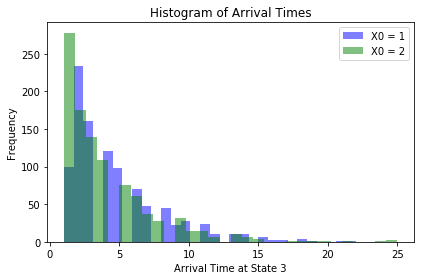

Mean Arrival Time (X0 = 1): 4.592
Mean Arrival Time (X0 = 2): 3.834


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to simulate arrival time at state 3
def simulate_arrival_time(start_state):
    current_state = start_state
    time = 0
    while current_state != 3:  # Keep simulating until arriving at state 3
        probabilities = P[current_state - 1]
        current_state = np.random.choice([1, 2, 3], p=probabilities)
        time += 1
    return time

# Number of simulations for each initial state
num_simulations = 1000

# Simulate arrival times for X0 = 1 and X0 = 2
arrival_times_x0_1 = [simulate_arrival_time(1) for _ in range(num_simulations)]
arrival_times_x0_2 = [simulate_arrival_time(2) for _ in range(num_simulations)]

# Plot histograms together
plt.hist(arrival_times_x0_1, bins=30, alpha=0.5, color='blue', label='X0 = 1')
plt.hist(arrival_times_x0_2, bins=30, alpha=0.5, color='green', label='X0 = 2')
plt.title('Histogram of Arrival Times')
plt.xlabel('Arrival Time at State 3')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Compute and print the mean arrival time for both initial states
mean_arrival_x0_1 = np.mean(arrival_times_x0_1)
mean_arrival_x0_2 = np.mean(arrival_times_x0_2)

print(f"Mean Arrival Time (X0 = 1): {mean_arrival_x0_1}")
print(f"Mean Arrival Time (X0 = 2): {mean_arrival_x0_2}")
